In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.datasets import fetch_mldata

In [264]:
mnist = pd.read_csv('mnist_train.csv')

In [265]:
mnist.rename({'5':'label'},axis=1,inplace=True)
# mnist.head(10)

In [266]:
y = mnist['label']
x = mnist.drop('label', axis=1)

In [346]:
def find_most_uncertain(model, X, n):
    probs = model.predict_proba(X)
    prob_maxs = []
    for i in range(0,len(probs)):
        prob_maxs.append((i,max(probs[i])))
    
    prob_maxs.sort(key = lambda x: x[1])
    return [x[0] for x in prob_maxs[:n]]

def sample_df_updates(X,y,n_sample):
    sample_indices = np.random.choice(len(X),n_sample, replace=False)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]
    X.drop(X.index[sample_indices],inplace=True)
    y.drop(y.index[sample_indices],inplace=True)

    return X_sample, y_sample, X, y


def sample_from_uncertain(X,y,n_sample,model):
    sample_indices = find_most_uncertain(model, X, n_sample)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]
    X.drop(X.index[sample_indices],inplace=True)
    y.drop(y.index[sample_indices],inplace=True)

    return X_sample, y_sample, X, y

In [436]:
def mlp_active_random(X,y,n_start,n_step,n_test):
    X_test,y_test,x,y = sample_df_updates(X,y,n_test)
    mlp = MLPClassifier(hidden_layer_sizes=(300,300))
    X_sample, y_sample, X, y = sample_df_updates(X,y,n_start)
    mlp.fit(X_sample,y_sample)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    sample_count = n_start
    sample_count_list = [sample_count]
    accuracies = [accuracy]
    searching = True
    
    while searching == True:
        mlp = MLPClassifier(hidden_layer_sizes=(300,300),warm_start=True)
        X_temp, y_temp, X, y = sample_df_updates(X,y,n_step)
        X_sample = pd.concat([X_sample,X_temp])
        y_sample = pd.concat([y_sample,y_temp])
        mlp.fit(X_sample,y_sample)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        sample_count += n_step
        accuracies.append(accuracy)
        sample_count_list.append(sample_count)
        if accuracy > .95:
            searching = False
        
    print(f'Final samples : {sample_count}')
    print(f'Final accuracy : {accuracy}')
    plt.plot(sample_count_list,accuracies)

Final samples : 14500
Final accuracy : 0.95125


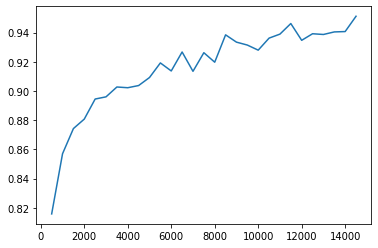

In [297]:
mlp_active_random(x,y,500,500,4000)

In [279]:
def mlp_active_probability(X,y,n_start,n_step,n_test):
    X_test,y_test,x,y = sample_df_updates(X,y,n_test)
    mlp = MLPClassifier(hidden_layer_sizes=(300,300))
    X_sample, y_sample, X, y = sample_df_updates(X,y,n_start)
    mlp.fit(X_sample,y_sample)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    sample_count = n_start
    sample_count_list = [sample_count]
    accuracies = [accuracy]
    
    searching = True
    
    while searching == True:
        X_temp, y_temp, X, y = sample_from_uncertain(X,y,n_step,mlp)
        
        mlp = MLPClassifier(hidden_layer_sizes=(300,300),warm_start=True)
        
        X_sample = pd.concat([X_sample,X_temp])
        y_sample = pd.concat([y_sample,y_temp])
        mlp.fit(X_sample,y_sample)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        sample_count += n_step
        accuracies.append(accuracy)
        sample_count_list.append(sample_count)
        if accuracy >.95:
            searching = False
        
    print(f'Final samples : {sample_count}')
    print(f'Final accuracy : {accuracy}')
    plt.plot(sample_count_list,accuracies)
    

In [374]:
mnist = pd.read_csv('mnist_train.csv')
mnist.rename({'5':'label'},axis=1,inplace=True)
y = mnist['label']
x = mnist.drop('label', axis=1)

Final samples : 9500
Final accuracy : 0.956


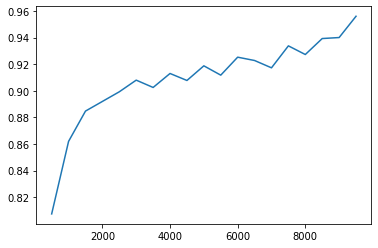

In [281]:
mlp_active_probability(x,y,500,500,4000)

In [323]:
def euclidian_distance(array_1,array_2):
    dist = 0
    for n in range(0,len(array_1)):
        dist += (array_1[n] - array_2[n])**2
    return dist

In [302]:
y_pred_test = mlp.predict(x[:100])

In [307]:
x[:100][y_pred_test == 0 ]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
x[:100][y_pred_test == 1]
for n in range(0,len(x[:100][y_pred_test == 1])):
    print(euclidian_distance(x.iloc[0],x[:100][y_pred_test == 1].iloc[n]))

7653668
7388793
7559415
7505612
7195240
7290739
7231095
7819459
7965476
7263045
7093141
7238579
7246510
7531690
7352232
7477842
7091066
7333682
6026214
7628944
7309889


In [330]:
def distance_to_closest_neighbor(point, df):
    dists = []
    for n in range(0,len(df)):
        dists.append(euclidian_distance(point,df.iloc[n]))
    return min(dists)

In [332]:
distance_to_closest_neighbor(x.iloc[0], x[:100][y_pred_test != 0])

5436361

In [342]:
def assemble_min_distances(X, y_pred, n_to_return):
    min_dists = []
    for n in range(0,len(X)):
        point = X.iloc[n]
        df = X[y_pred != y_pred[n]]
        min_dists.append((n,distance_to_closest_neighbor(point, df)))
    min_dists.sort(key = lambda x: x[1])
    return [x[0] for x in min_dists[:n_to_return]]

This takes way too long to go through long arrays. It really ought to be vectorized. Below follows a demonstration of how the time savings through a simple vectorization through numpy:

In [409]:
import time
start_time = time.time()
assemble_min_distances(x[:20], y_pred_test[:20],5)
print(time.time() - start_time)

4.28098201751709


In [410]:
assemble_min_distances(x[:20], y_pred_test[:20],5)

[7, 13, 5, 16, 18]

In [402]:
def alt_min_distances(X, y_pred, n_to_return):
    min_dists = []
    for n in range(0,len(X)):
        point = np.asarray(X.iloc[n])
        array = np.asanyarray(X[y_pred != y_pred[n]])
        dist_2 = np.sum((array - point)**2, axis=1)
        min_dists.append((n, min(dist_2)))
        min_dists.sort(key = lambda x: x[1])
    return [x[0] for x in min_dists[:n_to_return]]

In [411]:
start_time = time.time()
alt_min_distances(x[:20], y_pred_test[:20],5)
print(time.time() -start_time)

0.015544891357421875


In [412]:
alt_min_distances(x[:20], y_pred_test[:20],5)

[7, 13, 5, 16, 18]

This still takes way too long to run local in a meaningful way. So, I've created an alternate version of the sample function. This one checks if there are more than 5,000 rows, and if so does the following:
1. creats a sample pool, which is a random selection of those rows
2. uses the distance to decision boundary to select points out of this sample pool (thereby greatly reducing the number of comparitive loops)
3. updates the model as per usual
4. dumps the utilized points
5. merges what's left of the sample pool with the rest of the dataframe

In [ ]:
# def sample_from_dist_to_boundary(X,y,n_sample,model):

#     y_pred = model.predict(X)
    
#     sample_indices = alt_min_distances(X, y_pred, n_sample)
#     X_sample = X.iloc[sample_indices]
#     y_sample = y.iloc[sample_indices]
#     X.drop(X.index[sample_indices],inplace=True)
#     y.drop(y.index[sample_indices],inplace=True)

#     return X_sample, y_sample, X, y

In [427]:
def sample_from_dist_to_boundary(X,y,n_sample,model):    
    length = len(X)
    if length > 5000:
        temp_indices = np.random.choice(len(X),5000, replace=False)
        sample_pool = X.iloc[temp_indices]
        sample_pool_y = y.iloc[temp_indices]
        X.drop(X.index[temp_indices],inplace=True)
        y.drop(y.index[temp_indices],inplace=True)
    else:
        sample_pool = X
        sample_pool_y = y
    
    y_pred = model.predict(sample_pool)
    
    sample_indices = alt_min_distances(sample_pool, y_pred, n_sample)
    X_sample = sample_pool.iloc[sample_indices]
    y_sample = sample_pool_y.iloc[sample_indices]
    sample_pool.drop(sample_pool.index[sample_indices],inplace=True)
    sample_pool_y.drop(sample_pool_y.index[sample_indices],inplace=True)
    
    if length > 5000:
        X = pd.concat([X,sample_pool])
        y = pd.concat([y,sample_pool_y])
    else:
        X = sample_pool
        y = sample_pool_y

    return X_sample, y_sample, X, y

In [414]:
y_pred_test_2 = mlp.predict(x[:10000])

In [415]:
start_time = time.time()
alt_min_distances(x[:10000], y_pred_test_2,5)
print(time.time() -start_time)

492.6853380203247


In [428]:
start_time = time.time()
X_sample, y_sample, X, y = sample_from_dist_to_boundary(x,y,20,mlp)
print(time.time() -start_time)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


125.75012993812561


In [417]:
def mlp_active_dist_to_boundary(X,y,n_start,n_step,n_test):
    X_test,y_test,x,y = sample_df_updates(X,y,n_test)
    mlp = MLPClassifier(hidden_layer_sizes=(300,300))
    X_sample, y_sample, X, y = sample_df_updates(X,y,n_start)
    mlp.fit(X_sample,y_sample)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    sample_count = n_start
    sample_count_list = [sample_count]
    accuracies = [accuracy]
    
    searching = True
    
    while searching == True:
        sample_n = 1
        start_time = time.time()
        
        X_temp, y_temp, X, y = sample_from_dist_to_boundary(X,y,n_step,mlp)
        
        mlp = MLPClassifier(hidden_layer_sizes=(300,300),warm_start=True)
        
        X_sample = pd.concat([X_sample,X_temp])
        y_sample = pd.concat([y_sample,y_temp])
        mlp.fit(X_sample,y_sample)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        sample_count += n_step
        accuracies.append(accuracy)
        sample_count_list.append(sample_count)
        print(f'sample {sample_n}, accuracy {accuracy} -- time : {time.time()-start_time}')
        n +=1
        if accuracy >.85:
            searching = False
        
    print(f'Final samples : {sample_count}')
    print(f'Final accuracy : {accuracy}')
    plt.plot(sample_count_list,accuracies)

In [432]:
mnist = pd.read_csv('mnist_train.csv')
mnist.rename({'5':'label'},axis=1,inplace=True)
y = mnist['label']
x = mnist.drop('label', axis=1)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


sample 1, accuracy 0.82775 -- time : 124.92428708076477


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


sample 1, accuracy 0.83425 -- time : 127.1889111995697


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


sample 1, accuracy 0.84925 -- time : 133.44353199005127


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


sample 1, accuracy 0.83825 -- time : 135.02302289009094


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


sample 1, accuracy 0.85775 -- time : 123.71493363380432
Final samples : 3000
Final accuracy : 0.85775


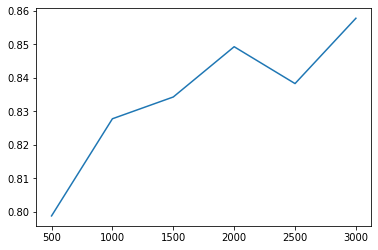

In [430]:
mlp_active_dist_to_boundary(x,y,500,500,4000)

In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(300,300),)
mlp.fit(x[:1000],y[:1000])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [49]:
y_pred = mlp.predict(x)
print(accuracy_score(y,y_pred))

0.837930632177203


In [27]:
mnist_test = pd.read_csv('mnist_test.csv')
mnist_test.rename({'7':'label'},axis=1,inplace=True)
test_pred = mlp.predict(mnist_test.drop('label',axis=1))
accuracy_score(mnist_test['label'],test_pred)

0.9731973197319732

In [58]:
probs = mlp.predict_proba(x[6000:6010])

In [59]:
for set_ in probs:
    print(max(set_))

1.0
1.0
1.0
0.9999988480328849
0.9999999999999998
0.6973130610582168
0.9999999999997746
1.0
1.0
0.9999993035756932


In [55]:
for prob in probs[0]:
    print(prob)

9.63164644900617e-82
1.0
3.084986421018088e-38
5.619757387326777e-50
1.1975441376348185e-59
5.297694258077202e-37
3.9463097329598e-66
2.990727935990592e-65
6.623394843310655e-44
1.8803667918308338e-37


In [106]:
x.loc[indexes]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
